In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import shap

In [42]:
from sklearn.datasets import load_boston
boston_housing_dataset = load_boston()
print(boston_housing_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
features = boston_housing_dataset['feature_names']
X = pd.DataFrame(boston_housing_dataset['data'], columns=features)
X['target'] = boston_housing_dataset['target']

X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
from sklearn.linear_model import BayesianRidge
lin_regression = BayesianRidge()
lin_regression.fit(X=X[features], y=X['target'])

BayesianRidge()

<BarContainer object of 13 artists>

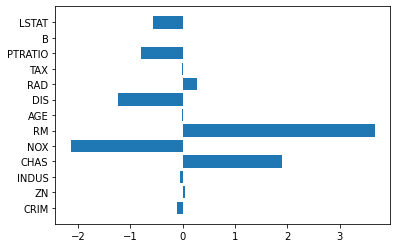

In [45]:
plt.barh(features, lin_regression.coef_)

In [46]:
exp = shap.Explainer(lin_regression, X[features])
exp

In [47]:
shap_values = exp(X[features])
shap_values.values

array([[ 0.3536857 ,  0.27580107,  0.36002275, ...,  2.48665734,
         0.31941237,  4.21668913],
       [ 0.35155656, -0.61949545,  0.15136727, ...,  0.49350461,
         0.31941237,  1.87926584],
       [ 0.35155859, -0.61949545,  0.15136727, ...,  0.49350461,
         0.27856282,  4.75047569],
       ...,
       [ 0.34816352, -0.61949545, -0.06167172, ..., -2.05773087,
         0.31941237,  3.84584793],
       [ 0.3432104 , -0.61949545, -0.06167172, ..., -2.05773087,
         0.2847856 ,  3.37386823],
       [ 0.34951769, -0.61949545, -0.06167172, ..., -2.05773087,
         0.31941237,  2.5872354 ]])

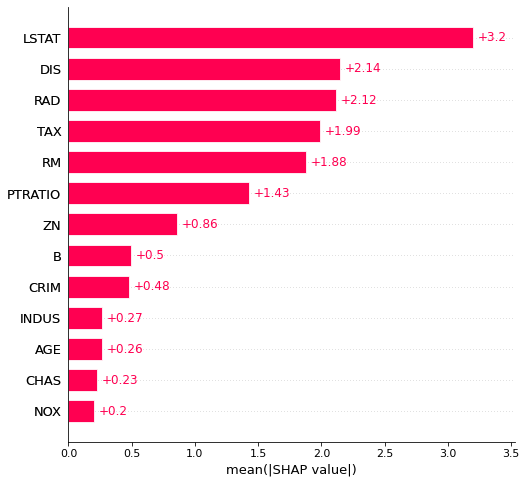

In [48]:
shap.plots.bar(shap_values, max_display=None)

In [49]:
weight_times_deviation = lin_regression.coef_*X[features].std()
weight_times_deviation

CRIM      -0.872506
ZN         1.160028
INDUS     -0.300725
CHAS       0.481280
NOX       -0.248202
RM         2.581419
AGE       -0.298876
DIS       -2.622083
RAD        2.439911
TAX       -2.370049
PTRATIO   -1.726027
B          0.916303
LSTAT     -4.012424
dtype: float64

<AxesSubplot:>

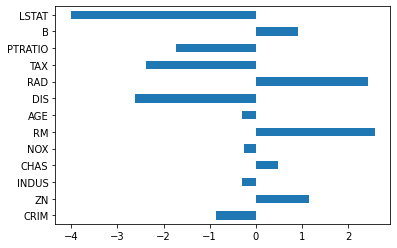

In [50]:
weight_times_deviation.plot.barh()

<AxesSubplot:>

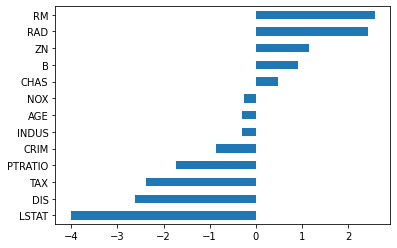

In [51]:
weight_times_deviation.sort_values().plot.barh()

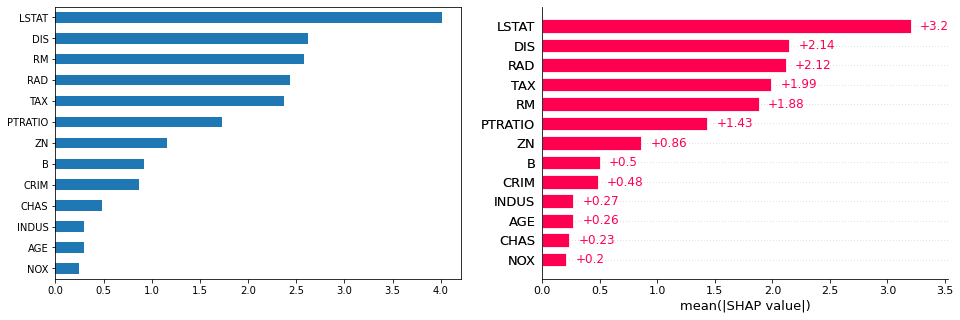

In [52]:
fig, ax = plt.subplots(1, 2)
weight_times_deviation.abs().sort_values().plot.barh(ax=ax[0])
shap.plots.bar(shap_values, max_display=None, show=False)
fig.set_size_inches(16, 5)

Text(0, 0.5, 'Output of the model')

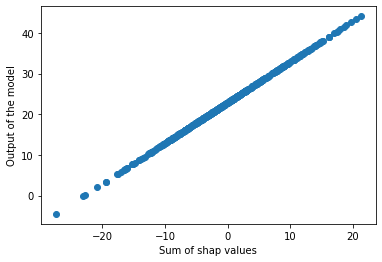

In [57]:
predicted_home_price = lin_regression.predict(X[features])
sum_shap = shap_values.values.sum(axis=1)
plt.scatter(sum_shap, predicted_home_price)
plt.xlabel("Sum of shap values")
plt.ylabel("Output of the model")